In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os


import warnings
warnings.filterwarnings('ignore')

In [156]:
np.random.seed(1234)
directory="data/Training/"
classes=["Apple Braeburn","Avocado","Banana Lady Finger","Blueberry",
         "Pineapple","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        all_arrays.append([img_array,class_num])

In [157]:
directory2="data/Test/"
classes2=["Apple Braeburn","Avocado","Banana Lady Finger","Blueberry",
          "Pineapple","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        all_arrays2.append([img_array2,class_num2])

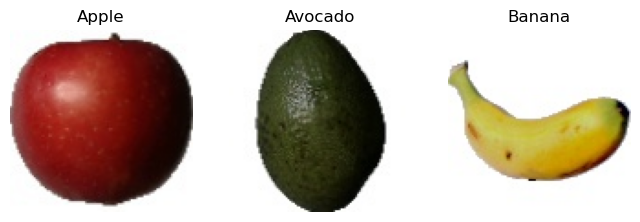

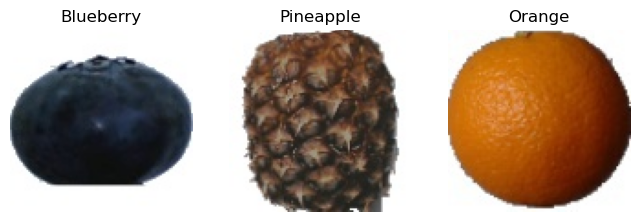

In [158]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500]]
fruit_names=["Apple","Avocado","Banana","Blueberry",
         "Pineapple","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [159]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test)

In [160]:
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (2800, 100, 100, 3)
shape of X_test=   (939, 100, 100, 3)


In [161]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [162]:
Y_train.shape

(2800, 9)

In [163]:
X_train.shape

(2800, 100, 100, 3)

In [164]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [165]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

In [166]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0.5,
                           zoom_range=0.5,
                           width_shift_range=0.5,
                           height_shift_range=0.5,
                           horizontal_flip=False,
                           vertical_flip=False,
                           )
datagen.fit(x_train)

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
124/124 [==============================] - 12s 87ms/step - loss: 1.4756 - accuracy: 0.4064 - val_loss: 0.6482 - val_accuracy: 0.7500
Epoch 2/10
124/124 [==============================] - 12s 94ms/step - loss: 0.4809 - accuracy: 0.8249 - val_loss: 0.1051 - val_accuracy: 0.9750
Epoch 3/10
124/124 [==============================] - 13s 101ms/step - loss: 0.1637 - accuracy: 0.9554 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 4/10
124/124 [==============================] - 12s 97ms/step - loss: 0.0835 - accuracy: 0.9730 - val_loss: 0.0130 - val_accuracy: 0.9982
Epoch 5/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/10
124/124 [==============================] - 12s 96ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 7/10
124/124 [==============================] - 11s 90ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0079 - val_accuracy

18/18 [==============================] - 0s 15ms/step


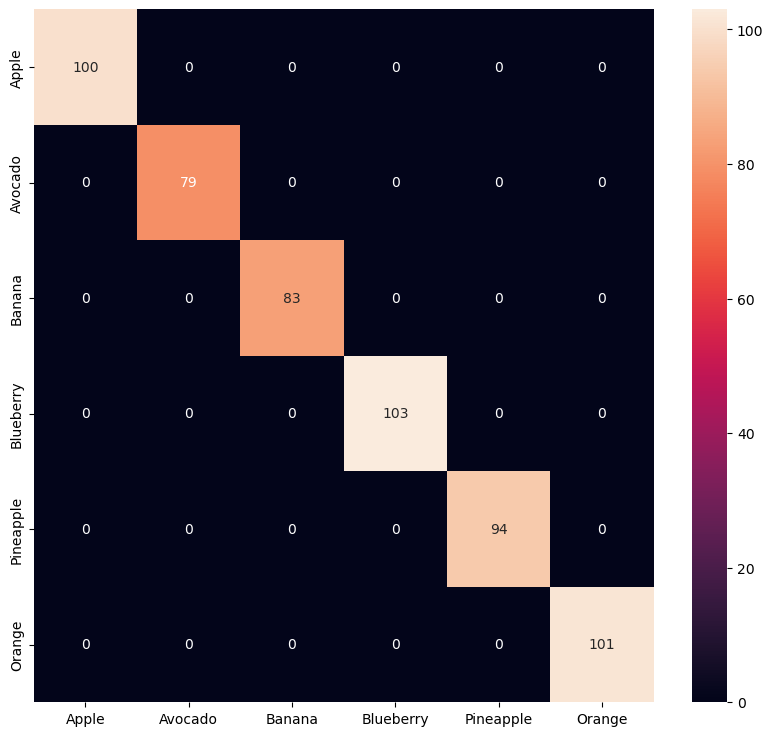

In [167]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)

conf_mat=confusion_matrix(y_true,y_pred_classes)

fruit_names=["Apple","Avocado","Banana","Blueberry",
         "Pineapple","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

30/30 [==============================] - 1s 19ms/step


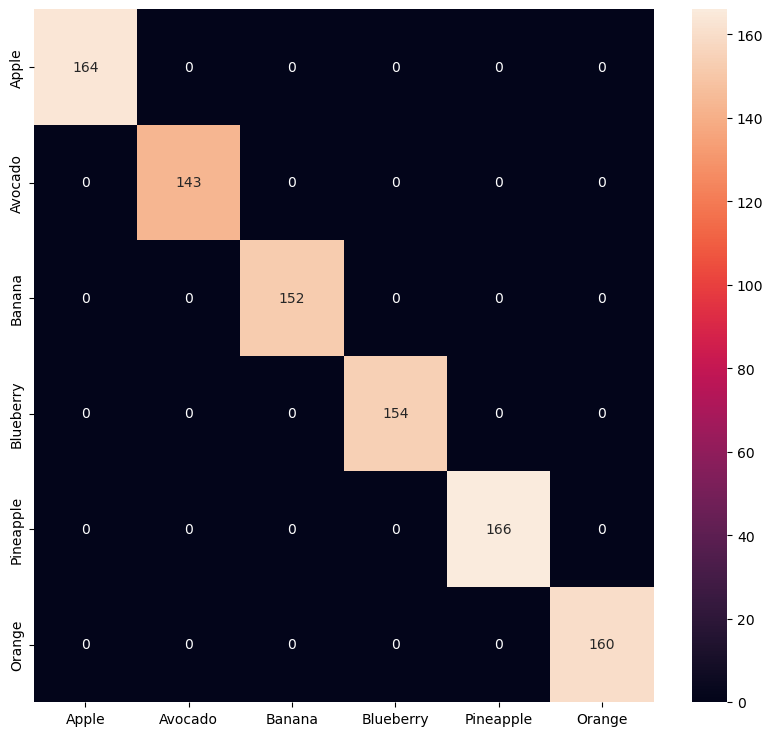

In [168]:

y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)

conf_mat2=confusion_matrix(y_true2,y_pred_classes2)

f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [195]:
import numpy as np
from PIL import Image
import tensorflow as tf

class_names = ["Apple","Avocado","Banana","Blueberry",
         "Pineapple","Orange"]

image_path = 'imageExample/many-pineapples.jpeg'
image = Image.open(image_path)
image = image.resize((100, 100))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)
class_index = np.argmax(predictions[0])
class_label = class_names[class_index]

print(f"Predicted class: {class_label}")

1/1 [==============================] - 0s 22ms/step
Predicted class: Pineapple
